1. (Account Inheritance Hierarchy) Create an inheritance hierarchy that a bank might use to represent customer bank accounts. All customers at this bank can deposit money into their accounts and withdraw money from their accounts. More specific types of accounts also exist. Savings accounts, for instance, earn interest on the money they hold. Checking accounts, on the other hand, don’t earn interest and charge a fee per transaction.

>Start with class **Account** from this chapter and create two subclasses **SavingsAccount** and **CheckingAccount**. A **SavingsAccount** should also include a data attribute indicating the interest rate. A **SavingsAccount**’s **calculate_interest** method should return the Decimal result of multiplying the interest rate by the account balance. **SavingsAccount** should inherit methods **deposit** and **withdraw** without redefining them.

>A **CheckingAccount** should include a Decimal data attribute that represents the **fee** charged per transaction. Class **CheckingAccount** should **override** methods **deposit** and **withdraw** so that they subtract the fee from the account balance whenever either transaction is performed successfully. **CheckingAccount**’s versions of these methods should invoke the base-class **Account** versions to update the account balance. **CheckingAccount**’s withdraw method should charge a fee only if money is withdrawn (that is, the withdrawal amount does not exceed the account balance).

>Create objects of each class and tests their methods. Add interest to the **SavingsAccount** object by invoking its **calculate_interest** method, then passing the returned interest amount to the object’s deposit method.

In [26]:
from decimal import Decimal 
class Account:
    def __init__(self, name, balance):
        if balance <= Decimal('0.00'):
            raise ValueError("please input value balance greater than 0")
        self.name=name
        self.balance=balance 
    def deposit(self,amount):
        if amount<= Decimal('0.00'):
            raise ValueError("amount must be positive")
        self.balance+=amount
    def withdraw(self,amount):
        if amount<= Decimal('0.00'):
            raise ValueError("amount must be positive")
        if amount>= self.balance:
            raise ValueError("Withdraw amount must be less than or equal to the balance ")
        self.balance-=amount
account1 = Account ('John', Decimal('50.00'))
class SavingAccount(Account):
  def __init__(self, name, balance,interest):
        Account.__init__(self, name, balance)
        if interest <= Decimal('0.00'):
            raise ValueError("please input value interest greater than 0")
        self.interest= interest
  def calculate_interest (self):
            self.balance*=(Decimal('100.00')+self.interest)/Decimal('100.00')
account2 = SavingAccount ('John', Decimal('50.00'),Decimal('1.5'))
class CheckingAccount(Account):
  def __init__(self, name, balance,fee):
        Account.__init__(self, name, balance)
        if fee < Decimal('0.00'):
            raise ValueError("please input value fee equal or greater than 0")
        self.fee=fee
  def withdraw (self,amount):
    if amount>= self.balance+self.fee:
            raise ValueError("Withdraw amount must be less than or equal to the balance ")
    self.balance-=(amount+ self.fee)
account3 = CheckingAccount ('Jane', Decimal('50.00'),Decimal('1.5'))

In [27]:
account3.balance

Decimal('50.00')

2. (Nested Functions and Namespaces) Section 10.15 **discussed namespaces and how Python uses them to determine which identifiers are in scope**. We also mentioned the LEGB (local, enclosing, global, built-in) rule for the order in which Python searches for identifiers in namespaces. For each of the print function calls in the following IPython session, list the namespaces that Python searches for print’s argument:

>>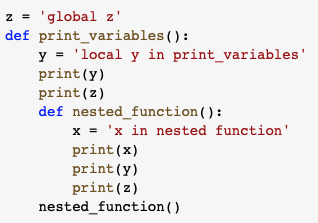

In [ ]:
z = 'global z'
def print_variables():
    y = 'local y in print_variables'
    print(y)
    print(z)
    def nested_function():
        x = 'x nested function'
        print(x)
        print(y)
        print(z)
    nested_function()
print_variables()

3. (Duck Typing) Recall that with duck typing, objects of unrelated classes can respond to the same method calls if they implement those methods. In Section 10.8, you created a list containing a **CommissionEmployee** and a **SalariedCommissionEmployee**. Then, you iterated through it, displaying each employee’s string **representation** and **earnings**. Create a class SalariedEmployee for an employee that gets paid a fixed weekly salary. Do not inherit from **CommissionEmployee** or **SalariedCommissionEmployee**. In class SalariedEmployee, override method **__repr__** and provide an earnings method. Demonstrate duck typing by creating an object of your class, adding it to the list at the end of Section 10.8, then executing the loop to show that it properly processes objects of all three classes.

In [15]:
from decimal import Decimal
class CommissionEmployee:
    def __init__(self, first_name, last_name, ssn,
                gross_sales, commission_rate):

        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn
        self.gross_sales = gross_sales 
        self.commission_rate = commission_rate 

    @property
    def first_name(self):
        return self._first_name

    @property
    def last_name(self):
        return self._last_name

    @property
    def ssn(self):
        return self._ssn

    @property
    def gross_sales(self):
        return self._gross_sales

    @gross_sales.setter
    def gross_sales(self, sales):
        if sales < Decimal('0.00'):
            raise ValueError('Gross sales must be >= to 0')

        self._gross_sales = sales

    @property
    def commission_rate(self):
        return self._commission_rate

    @commission_rate.setter
    def commission_rate(self, rate):

        if not (Decimal('0.0') < rate < Decimal('1.0')):
            raise ValueError('Interest rate must be greater than 0 and less than 1')

        self._commission_rate = rate

    def earnings(self):
        return self.gross_sales * self.commission_rate

    def __repr__(self):
        return ('CommissionEmployee: ' +
            f'{self.first_name} {self.last_name}\n' +
            f'social security number: {self.ssn}\n' +
            f'gross sales: {self.gross_sales:.2f}\n' +
            f'commission rate: {self.commission_rate:.2f}')  

4. **(Read 10.13)**(Creating an Account Data Class Dynamically) The dataclasses module’s make_dataclass function creates a data class dynamically from a list of strings that repre- sent the data class’s attributes. Research function make_dataclass, then use it to generate an Account class from the following list of strings:
['account', 'name', 'balance']
Create objects of the new Account class, then display their string representations and
compare the objects with the == and != operators.

5. (Creating an Account Data Class Dynamically) The dataclasses module’s make_dataclass function creates a data class dynamically from a list of strings that repre- sent the data class’s attributes. Research function make_dataclass, then use it to generate an Account class from the following list of strings:
['account', 'name', 'balance']
Create objects of the new Account class, then display their string representations and
compare the objects with the == and != operators.

In [16]:
from decimal import Decimal

class Account:  
    def __init__(self, name, balance):
        if balance < Decimal('0.00'):
            raise ValueError('Initial balance must be >= to 0.00.')

        self.name = name
        self.balance = balance

    def deposit(self, amount):
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')
        self.balance += amount
    def __repr__(self):
        return "%s(%s,%s)" % (self.__class__.__name__, repr(self.name), repr(self.balance))

6. (Immutable Data Class Objects) Built-in types int, float, str and tuple are immutable. Data classes can simulate immutability by designating that objects of the class should be **“frozen”** after they’re created. Client code cannot assign values to the attributes of a frozen object. Research “frozen” data classes, then reimplement this chapter’s Complex
class as a “frozen” data class. Show that you cannot modify a Complex object after you create it.

In [14]:
import math
from math import sqrt
from dataclasses import dataclass

@dataclass(frozen=True)

class Complex:
    def __init__(self, real, imaginary):
        self.real = real
        self.imaginary = imaginary

    def __add__(self, right):
        return Complex(self.real + right.real, 
                       self.imaginary + right.imaginary)

    def __iadd__(self, right):
        self.real += right.real
        self.imaginary += right.imaginary
        return self

    def __sub__(self, right):
        return Complex(self.real - right.real, 
                       self.imaginary - right.imaginary)

    def __isub__(self, right):
        self.real -= right.real
        self.imaginary -= right.imaginary
        return self

    def __repr__(self):
        return (f'({self.real}' + 
                (' + ' if self.imaginary >= 0 else ' - ') +
                f'{abs(self.imaginary)}i)')